#  <font color='dark gary'> Anomaly detection method
https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

# <font color='red'> 3. Unsupervised learning (Outlier detection)
- inlier와 outlier를 포함한 훈련데이터에서 outliers를 탐색
        * Anomaly는 outlier와 novelty를 모두 호칭

## 3.1 Elliptic Envelop Algorithm
- 입력변수의 공분산이 가능한 고차원 데이터를 가우스 분포를 가정하여 모델링하기위한 supervised and unsupervised 알고리즘
        * (가우시안 분포를 갖는 자료를 가정하여 타원형 경계 외부에 있는 자료를 이상치로 판정)
- sklearn의 EllipticEnvelope API를 이용한 이상치 예측(An object for detecting outliers in a Gaussian distributed dataset)
        
### <p> <font color= 'blue'> Intuition : We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as inliers and any observation outside the ellipse as an outlier.
        * 자료의 크기는 입력변수의 제곱보다 큰 경우에 적용(고차원 데이터)
    
- The scikit-learn provides an object covariance.EllipticEnvelope that fits a robust covariance estimate to the data, and thus fits an ellipse to the central data points, ignoring points outside the central mode.

In [4]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
true_cov = np.array([[.8, .3],
                     [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                 cov=true_cov,
                                                 size=500)
X[0:10]

array([[-1.61673103, -0.64316019],
       [-1.36314858,  0.51416492],
       [-1.38812887, -1.28529507],
       [-0.78603416, -0.50467625],
       [-0.0056125 ,  0.22487922],
       [-0.46025371,  0.5608042 ],
       [-0.6857151 , -0.29945373],
       [-0.4605907 , -0.06131079],
       [-1.24368003, -0.77946057],
       [-0.073319  , -0.51326387]])

### 1. Novelty detection(EllipticEnvelope())
- 평균(0,0)은 '1'로 정상자료로, 이상치(3,3)은 '-1'로 이상치로 판단

In [5]:
cov = EllipticEnvelope(random_state=0).fit(X)

# predict returns 1 for an inlier and -1 for an outlier
cov.predict([[0, 0],
             [3, 3]])

array([ 1, -1])

### 2. Outlier detection(EllipticEnvelope)

In [6]:
cov.predict(X)[0:10]
cov.covariance_
cov.location_

array([ 1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

array([0.0813539 , 0.04279722])

### <font color='red'> 실습 B. Multivariate gaussian distribution
- 두 독립변수의 분포는 정규분포이고 negative(y=0) 데이터가 800개, positive(y=1) 데이터 200개 
         * 첫번째 모집단 평균과 공분산
\begin{vmatrix}
-2 \\
-2
\end{vmatrix}
\begin{vmatrix}
1.0 & 0.9 & \\
0.9 & 2
\end{vmatrix}
    
          * 두번째 모집단 평균과 공분산
\begin{vmatrix}
+2 \\
+2
\end{vmatrix}
\begin{vmatrix}
1.2 & -0.5 & \\
-0.5 & 2
\end{vmatrix}

Text(0.5, 1.0, 'Multivariates pdf')

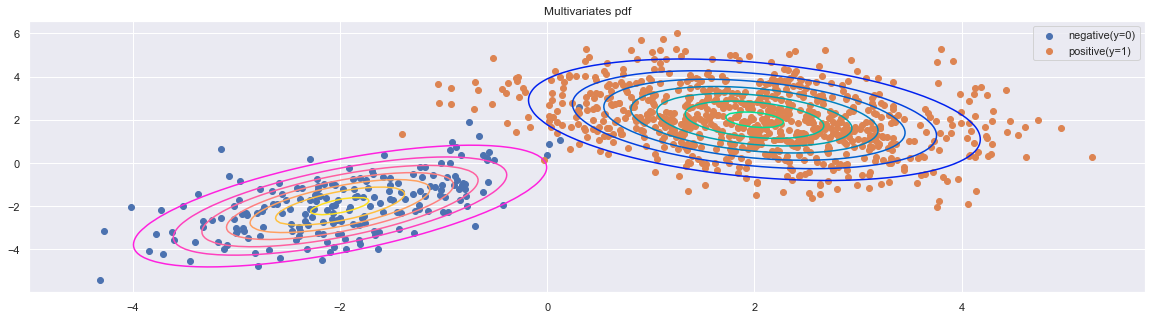

In [7]:
import scipy.stats as stats
np.random.seed(13)

rv0 = stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = stats.multivariate_normal([2, 2], [[1.2, -0.5], [-0.5, 2]])
x0 = rv0.rvs(200); x1 = rv1.rvs(800) # it is a fitting! ()

xx1 = np.linspace(-5, 5, 100); xx2 = np.linspace(-5, 5, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)

fig = plt.figure(figsize=(20,5))
plt.contour(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
plt.contour(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')
plt.scatter(x0[:, 0], x0[:, 1], label='negative(y=0)')
plt.scatter(x1[:, 0], x1[:, 1], label='positive(y=1)')
plt.legend(); plt.title("Multivariates pdf")

plt.show()

# 3.2 Mahalanobis distance
For instance, assuming that the inlier data are Gaussian distributed, it will estimate the inlier location and covariance in a robust way (i.e. without being influenced by outliers). The Mahalanobis distances obtained from this estimate is used to derive a measure of outlyingness. This strategy is illustrated below.
- https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html
- https://www.youtube.com/watch?v=spNpfmWZBmg
- https://www.youtube.com/watch?v=xXhLvheEF7o
- The mahalanobis distance is a distance measure between a point and a distribution. It takes into account the correlation between the variables.

Text(0.5, 1.0, 'Multivariates pdf')

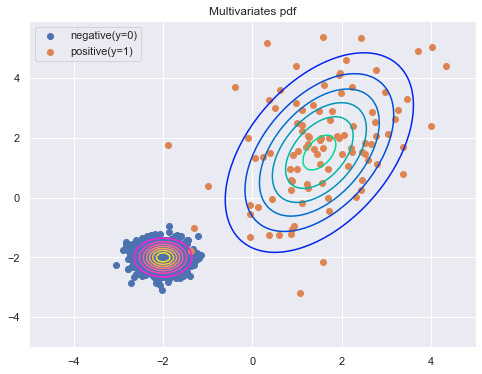

In [8]:
np.random.seed(11)

rv0 = stats.multivariate_normal([-2, -2], [[0.1, 0], [0, 0.1]])
rv1 = stats.multivariate_normal([1.5, 1.5], [[1.2, 0.8], [0.9, 3]])
x0 = rv0.rvs(800); x1 = rv1.rvs(100) # it is a fitting! ()

xx1 = np.linspace(-5, 5, 100); xx2 = np.linspace(-5, 5, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)

fig = plt.figure(figsize=(8,6))
plt.contour(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
plt.contour(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')
plt.scatter(x0[:, 0], x0[:, 1], label='negative(y=0)')
plt.scatter(x1[:, 0], x1[:, 1], label='positive(y=1)')
plt.legend(); plt.title("Multivariates pdf")

plt.show()

In [9]:
# for consistent results
np.random.seed(7)

n_samples = 125
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [10]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)

# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[ 3.26253567e+00 -3.06695631e-03]
 [-3.06695631e-03  1.22747343e+00]]
MLE:
[[ 3.23773583 -0.24640578]
 [-0.24640578  7.51963999]]


(-4.561265785217095, 10.0)

Text(0.5, 1.0, 'Mahalanobis distances of a contaminated data set')

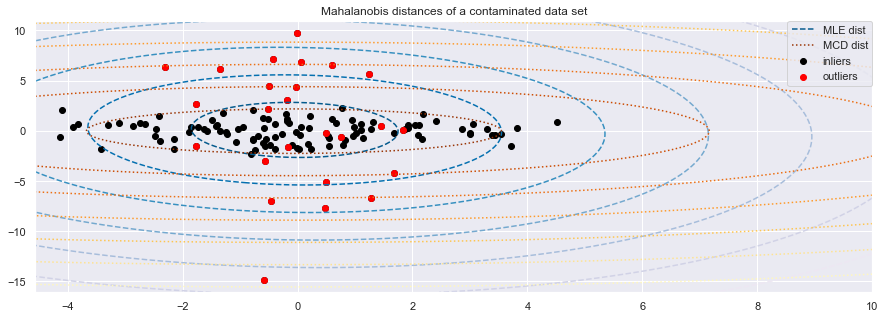

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1],
                         color='black', label='inliers')
outlier_plot = ax.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                          color='red', label='outliers')
ax.set_xlim(ax.get_xlim()[0], 10.)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(xx, yy, np.sqrt(mahal_emp_cov),
                              cmap=plt.cm.PuBu_r, linestyles='dashed')
# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov),
                            cmap=plt.cm.YlOrBr_r, linestyles='dotted')

# Add legend
ax.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
          inlier_plot, outlier_plot],
          ['MLE dist', 'MCD dist', 'inliers', 'outliers'],
          loc="upper right", borderaxespad=0)

plt.show()

To better visualize the difference, we plot contours of the Mahalanobis distances calculated by both methods. Notice that the robust MCD based Mahalanobis distances fit the inlier black points much better, whereas the MLE based distances are more influenced by the outlier red points.

### Condition monitoring use-case: Gear bearing failurePCA + Mahalanobis distance
- https://towardsdatascience.com/how-to-use-machine-learning-for-anomaly-detection-and-condition-monitoring-6742f82900d7
<img src = 'https://miro.medium.com/max/1540/1*gff6BQiMq-eClSXurOknTw.jpeg'>

### <font color='red'> 실습 B. Anomaly Detection using Gaussian Distribution
- Credit card fraud methods have become increasingly sophisticated with use of latest technology today by criminals. It is not a simple task anymore to identify outliers/Anamolous transactions before hand unless reported by the customer
- Lets get the dataframe for the Credit card transation data 
    
https://www.kaggle.com/mlg-ulb/creditcardfraud (Data obtain)

In [12]:
%time df = pd.read_csv('../data/creditcard.csv')
df = df[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']]
df = df.sample(frac=0.1)
df.head()

Wall time: 1.88 s


,V1,V2,V3,V4,V5,Class
210133,-1.244489,0.108489,0.973635,1.134152,0.528911,0
246364,1.937771,-0.616874,-0.386245,0.352387,-0.742611,0
257436,-0.676848,0.188221,1.093049,-2.320219,0.253972,0
92075,-0.546760,-3.648723,0.052244,-0.322335,-2.435134,0
174068,-0.592921,0.413011,0.196688,-0.211114,2.704736,0


In [13]:
X = df.drop(['Class'], axis=1)
cov = EllipticEnvelope(random_state=0).fit(X)
cov

EllipticEnvelope(random_state=0)

In [14]:
df['Ell'] = cov.predict(X)
df.loc[df['Ell'] == 1, 'Ell'] = 0
df.loc[df['Ell'] == -1, 'Ell'] = 1

In [15]:
df[df['Class'] == df['Ell']].head()
df[df['Class'] != df['Ell']].head()

,V1,V2,V3,V4,V5,Class,Ell
210133,-1.244489,0.108489,0.973635,1.134152,0.528911,0,0
246364,1.937771,-0.616874,-0.386245,0.352387,-0.742611,0,0
257436,-0.676848,0.188221,1.093049,-2.320219,0.253972,0,0
174068,-0.592921,0.413011,0.196688,-0.211114,2.704736,0,0
71475,0.278376,0.790074,0.388767,0.252324,0.426031,0,0


,V1,V2,V3,V4,V5,Class,Ell
92075,-0.546760,-3.648723,0.052244,-0.322335,-2.435134,0,1
238581,-0.860896,-0.585676,-4.136853,-0.154461,-0.120164,0,1
65445,-2.737817,0.426440,0.694096,1.535532,-1.407678,0,1
189389,0.574843,-2.701386,-2.478355,0.463651,0.312697,0,1
279072,-3.341723,-0.733000,0.363989,-1.187261,-0.238747,0,1


In [16]:
df[df['Class'] != df['Ell']].Class.value_counts()

0    2807
1       3
Name: Class, dtype: int64

# 3.3 Isolation Forest algorithm
- outlier는 희귀할 것이다. 즉 instances의 개수도 적을 뿐만아니라 일반 데이터의 속성값과는 다른 값을 가지고 있을 것이다라는 가정에서 출발
       * (tree-based algorithm으로 high-dimension 자료에서 anomaly(outlier, novelty) detection에 효과적)
       * (Random forests 알고리즘을 사용하면 효과적)

#### <p> <font color= 'blue'> Intuition : tree구조로 단지 몇 번의 가지치기를 통해 outlier를 isolate시킬 수 있지만 정상자료는 아주 여러번의 가기치기를 하여야 함

https://dodonam.tistory.com/129

In [17]:
from sklearn.ensemble import IsolationForest
X = np.array([[-1, -1], [-2, -1], [-3, -2], [0, 0], [-20, 50], [3, 5]])
X
clf = IsolationForest(n_estimators=10, warm_start=True)

clf.fit(X)  # fit 10 trees  

array([[ -1,  -1],
       [ -2,  -1],
       [ -3,  -2],
       [  0,   0],
       [-20,  50],
       [  3,   5]])

IsolationForest(n_estimators=10, warm_start=True)

The ensemble.IsolationForest supports warm_start=True which allows you to add more trees to an already fitted model:

In [18]:
clf.set_params(n_estimators=20)  # add 10 more trees  

clf.fit(X)  # fit the added trees  

IsolationForest(n_estimators=20, warm_start=True)

IsolationForest(n_estimators=20, warm_start=True)

In [19]:
clf.predict(X)

array([ 1,  1,  1,  1, -1, -1])

https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html
- The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
- Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.
- This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
- Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

가지치기는 변수를 무작위로 threshold도 무작위로 마구 해본다

In [20]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

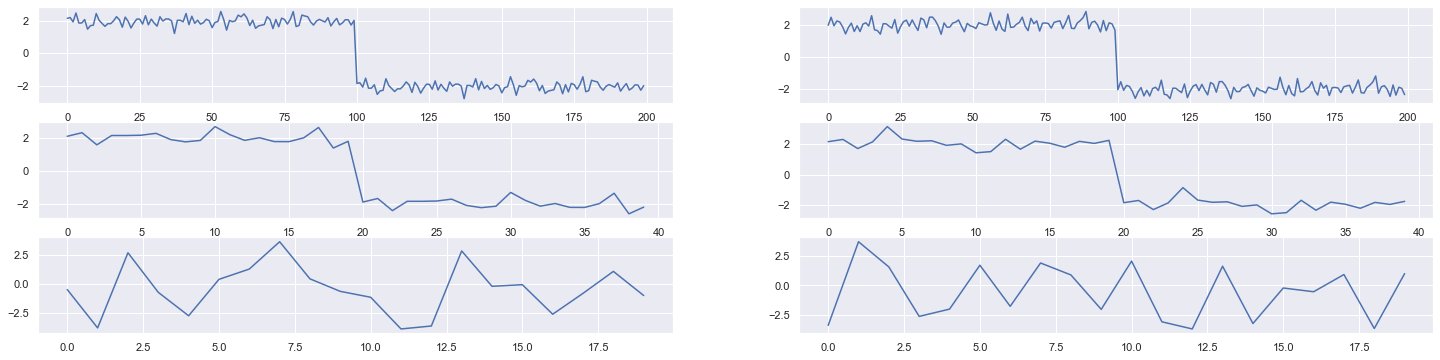

In [21]:
plt.rcParams["figure.figsize"] = (25,6)
fig, ax = plt.subplots(nrows=3, ncols=2) # 1 row by 4 columns
ax[0][0].plot(X_train[:, 0])
ax[0][1].plot(X_train[:, 1])
ax[1][0].plot(X_test[:, 0])
ax[1][1].plot(X_test[:, 1])
ax[2][0].plot(X_outliers[:, 0])
ax[2][1].plot(X_outliers[:, 1])

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x2587038EA40)

Text(0.5, 1.0, 'IsolationForest')

(-5.0, 5.0, -5.0, 5.0)

(-5.0, 5.0)

(-5.0, 5.0)

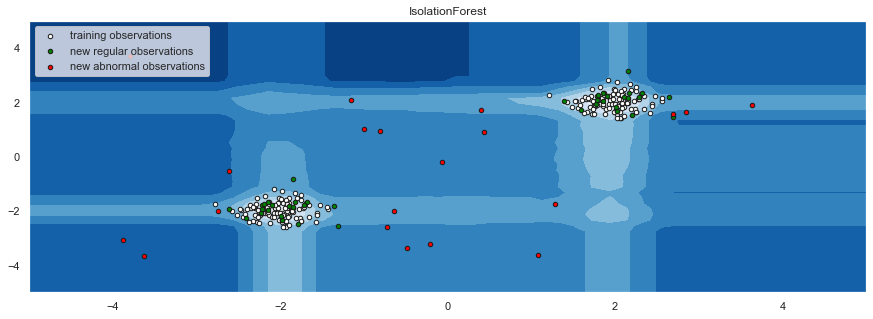

In [22]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(15,5))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

### <font color='red'> 실습 C. Isolation Forest (boston data)

In [27]:
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
cols = ['LSTAT','NOX','INDUS']
data = boston[cols]
data

,LSTAT,NOX,INDUS
0,4.98,0.538,2.31
1,9.14,0.469,7.07
2,4.03,0.469,7.07
3,2.94,0.458,2.18
4,5.33,0.458,2.18
...,...,...,...
501,9.67,0.573,11.93
502,9.08,0.573,11.93
503,5.64,0.573,11.93
504,6.48,0.573,11.93


In [28]:
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(boston['LSTAT'].values.reshape(-1,1))

IsolationForest()

In [29]:
anomaly_score = isolation_forest.decision_function(boston['LSTAT'].values.reshape(-1,1))
outlier = isolation_forest.predict(boston['LSTAT'].values.reshape(-1,1))
outlier

array([ 1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1

## 단변량 이상치 점수

IsolationForest()

Text(0.5, 1.0, 'LSTAT')

IsolationForest()

Text(0.5, 1.0, 'NOX')

IsolationForest()

Text(0.5, 1.0, 'INDUS')

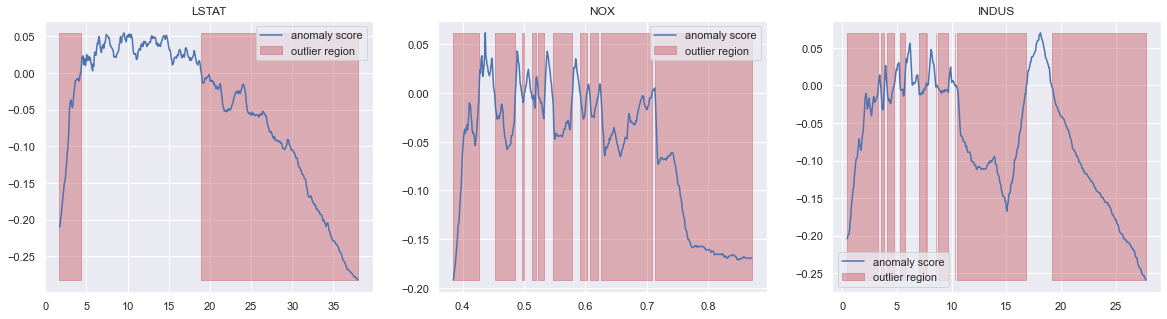

In [30]:
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(boston[column].values.reshape(-1,1))

    xx = np.linspace(boston[column].min(), boston[column].max(), len(boston)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

# 3. 4 Local Outlier Factor : outlier and novelty detection (hyperparameter to True)
- 밀도(density)기반 Clustering알고리즘을 바탕으로 특정 데이터 주변의 Local density로 novelty 점수를 산정한다.

### <p> <font color= 'blue'> Intuition : We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as inliers and any observation outside the ellipse as an outlier.

https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

## 1. Outlier detection
- lof=LocalOutlierFactor()
- lof.fit(X_train)
- lof.predict(X_train)

In [31]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [32]:
print(neigh.kneighbors([[1., 1., 1.]]))

(array([[0.5]]), array([[2]], dtype=int64))


This means that the element is at distance 0.5 and is the third element of samples (indexes start at 0)

## 2 Novelty detection
To use neighbors.LocalOutlierFactor for novelty detection, i.e. predict labels or compute the score of abnormality of new unseen data, you need to instantiate the estimator with the novelty parameter set to True before fitting the estimator: 
- lof=LocalOutlierFactor(novelty=True)
- lof.fit(X_train)
- lof.predict(X_new)

In [33]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)

clf.negative_outlier_factor_

array([ 1,  1, -1,  1])

array([ -0.98214286,  -1.03703704, -73.36970899,  -0.98214286])

# Summary

- Theimplementation of all techniques is quite similar except for LOF where the differencebetween outlier detection and novelty detection comes into play. 
- The Isolation Forest and LOF work well on high-dimensional data. For the purpose of visualization, we can apply the Principal Component Analysis to reduce thedimensionality of high-dimensional data.
- The Elliptic Envelope should only be used with data that satisfy the assumption ofnormality.
   * The most important hyperparameter in the Elliptic Envelope, Isolation Forest and LOF is the contamination hyperparameter. It represents the proportion of outliers in thedataset. In most cases, we do not know the exact value for the contamination hyperparameter. 
   * The best way to guess the value is that first do IQR-based detectionand count the number of outliers in the dataset.As you know the total of observations, you can get anapproximate value for the proportion of outliers. This is the value for the contamination hyperparameter!
- The One-class SVM is not very good for outlier detection, but the best option fornovelty detection when the training data is not much polluted with outliers. 

# End